In [59]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
import time
from PIL import Image
import cv2

from keras import backend as K
from tensorflow import keras
from tensorflow.keras.preprocessing import image
print(tf.__version__)

2.1.0


## tf.nn.conv2d_transpose

In [43]:
img = cv2.imread("D:/image/yx.jpg",0)

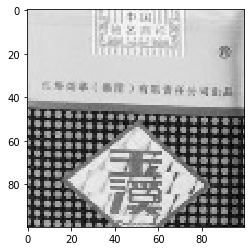

In [44]:
plt.imshow(img, cmap='Greys')

In [45]:
img

array([[ 59,  57,  57, ...,  73,  87,  94],
       [ 58,  56,  56, ...,  90, 100,  94],
       [ 66,  62,  61, ...,  94,  98,  93],
       ...,
       [130, 114, 218, ..., 226, 155, 124],
       [115, 148, 227, ..., 229, 219, 134],
       [214, 212, 227, ..., 222, 217, 229]], dtype=uint8)

In [46]:
input = tf.constant([img.astype('float32')],shape=[1,100,100,1])

In [47]:
kernel = tf.constant([
        [
            [1.0],  [0.0], [0.0],
            [0.0],  [1.0], [0.0],
            [0.0], [0.0],[-2.0]

        ]
    ],shape=[3,3,1,1])

In [48]:
conv2d = tf.nn.conv2d(input, kernel, strides=[1, 1, 1, 1], padding='SAME')

In [54]:
conv2d[0,:,:,0]

<tf.Tensor: shape=(100, 100), dtype=float32, numpy=
array([[ -53.,  -55.,  -57., ..., -127., -101.,   94.],
       [ -66.,   -7.,  -11., ...,  -38.,  -13.,  181.],
       [ -52.,    6.,   -1., ...,  -28.,    4.,  193.],
       ...,
       [-166., -220.,  138., ...,  -34.,  117.,  314.],
       [-309., -176.,  -57., ...,  -53.,  -13.,  289.],
       [ 214.,  327.,  375., ...,  422.,  446.,  448.]], dtype=float32)>

In [55]:
# plt.imshow(conv2d[0,:,:,0], cmap='Greys')

In [56]:
conv0d = tf.nn.conv2d_transpose(conv2d, kernel, strides=[1, 1, 1, 1], padding='SAME',output_shape=[1,100,100,1])

In [57]:
conv0d[0,:,:,0]

<tf.Tensor: shape=(100, 100), dtype=float32, numpy=
array([[ -60.,  -66.,  -71., ..., -140.,   80.,   94.],
       [ -60.,   98.,   95., ...,  190.,  434.,  383.],
       [ -39.,  139.,    9., ...,  113.,  270.,  219.],
       ...,
       [-342.,  -61.,  351., ...,   61.,  102.,  -14.],
       [  18.,  531.,  809., ...,  669.,  503.,   55.],
       [ 214.,  945.,  727., ...,  566.,  552.,  474.]], dtype=float32)>

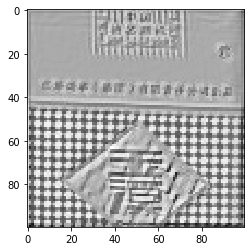

In [53]:
plt.imshow(conv0d[0,:,:,0], cmap='Greys')

In [55]:
np2 = conv2d[0,:,:,1]
np2.shape

TensorShape([100, 100])

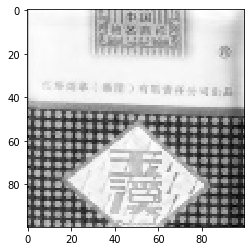

In [56]:
plt.imshow(conv2d[0,:,:,0], cmap='Greys')

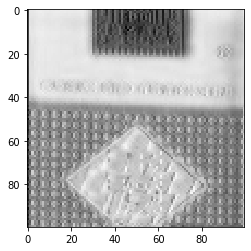

In [57]:
plt.imshow(conv2d[0,:,:,1], cmap='Greys')

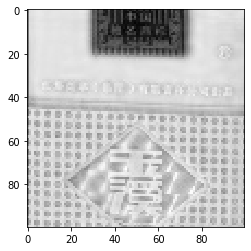

In [58]:
plt.imshow(conv2d[0,:,:,2], cmap='Greys')

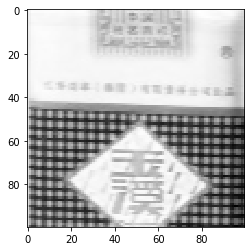

In [60]:
conv2d1 = tf.nn.conv2d(conv2d, kernel, strides=[1, 1, 1, 1], padding='SAME')
conv2d2 = tf.nn.conv2d(conv2d1, kernel, strides=[1, 1, 1, 1], padding='SAME')
conv2d3 = tf.nn.conv2d(conv2d2, kernel, strides=[1, 1, 1, 1], padding='SAME')

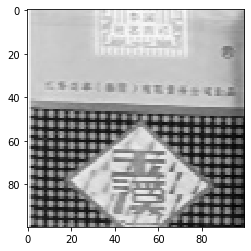

In [62]:
l4 = conv2d3.numpy()[0,:,:,2]
plt.imshow(l4, cmap='Greys')

## tf.keras.layers.Conv2D

In [2]:
img = image.load_img("D:/image/yx.jpg")
im = image.img_to_array(img)
im = np.expand_dims(im, axis=0)
im.shape

(1, 100, 100, 3)

In [3]:
conv = tf.keras.layers.Conv2D(filters=3,kernel_size=3,strides=(1,1),padding='same')
output = conv(im)

In [10]:
conv.bias

<tf.Variable 'conv2d/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>

In [6]:
help(conv)

Help on Conv2D in module tensorflow.python.keras.layers.convolutional object:

class Conv2D(Conv)
 |  Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  2D convolution layer (e.g. spatial convolution over images).
 |  
 |  This layer creates a convolution kernel that is convolved
 |  with the layer input to produce a tensor of
 |  outputs. If `use_bias` is True,
 |  a bias vector is created and added to the outputs. Finally, if
 |  `activation` is not `None`, it is applied to the outputs as well.
 |  
 |  When using this layer as the first layer in a model,
 |  provide the keyword argument `input_shape`
 |  (tuple of integers, does not include the sample axis),
 |  e.g. `input_shape=(128, 128, 3)` for 128

In [4]:
output

<tf.Tensor: shape=(1, 100, 100, 3), dtype=float32, numpy=
array([[[[  61.70579  ,  176.92935  ,  -59.956894 ],
         [  87.56442  ,  206.1251   ,   37.76771  ],
         [  86.62624  ,  211.99484  ,   36.05083  ],
         ...,
         [ 101.06096  ,  197.44371  ,   18.479498 ],
         [ 104.83223  ,  196.54662  ,   14.488762 ],
         [  90.935936 ,   92.65648  ,   75.63402  ]],

        [[  72.65063  ,  251.2406   ,  -71.17225  ],
         [  49.34532  ,  303.4967   ,   23.700388 ],
         [  45.796223 ,  313.95877  ,   20.465282 ],
         ...,
         [  58.86033  ,  330.63113  ,   -4.8668346],
         [  76.48657  ,  332.75348  ,   -2.961334 ],
         [ 107.5373   ,  132.54901  ,   75.85974  ]],

        [[  70.111595 ,  252.91873  ,  -75.21625  ],
         [  49.434246 ,  306.6978   ,   21.544113 ],
         [  46.074406 ,  316.29324  ,   18.288399 ],
         ...,
         [  71.88667  ,  334.18414  ,   -4.6449137],
         [  80.07176  ,  323.78802  ,   -1.53171

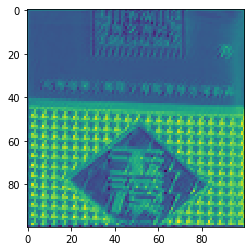

In [5]:
plt.imshow(output[0,:,:,0])

tf.nn.conv2d

In [217]:
kernel = tf.constant([
            [1.0],  [1.0], [1.0],
    [0.0],  [1.0], [0.0],
    [-1.0], [-2.0],[-1.0]
    ],shape=[3,3,1,1])
kernel

<tf.Tensor: shape=(3, 3, 1, 1), dtype=float32, numpy=
array([[[[ 1.]],

        [[ 1.]],

        [[ 1.]]],


       [[[ 0.]],

        [[ 1.]],

        [[ 0.]]],


       [[[-1.]],

        [[-2.]],

        [[-1.]]]], dtype=float32)>

In [226]:
np_k = np.array([
    [1.0],  [1.0], [1.0],
    [0.0],  [1.0], [0.0],
    [-1.0], [-2.0],[-1.0]],dtype='float32').reshape([3,3])

In [227]:
np_k

array([[ 1.,  1.,  1.],
       [ 0.,  1.,  0.],
       [-1., -2., -1.]], dtype=float32)

In [228]:
np_k.T

array([[ 1.,  0., -1.],
       [ 1.,  1., -2.],
       [ 1.,  0., -1.]], dtype=float32)

In [229]:
kernel_b  = tf.constant(np_k.T,shape=[3,3,1,1])

In [230]:
kernel  = tf.constant(np_k,shape=[3,3,1,1])

In [231]:
sample   = tf.constant([
        [  
            [[1.0], [2.0], [3.0]],
            [[4.0], [5.0], [6.0]],
            [[7.0], [8.0], [9.0]]
        ]
    ],shape=[1,3,3,1])
value = tf.nn.conv2d(sample, kernel, strides=[1, 1, 1, 1], padding='SAME')
value.numpy()[0,:,:,0]

array([[-12., -18., -14.],
       [-15., -21., -15.],
       [ 16.,  23.,  20.]], dtype=float32)

In [232]:
sample_b = tf.nn.conv2d_transpose(value, kernel, output_shape=[1,3,3,1], strides=[1, 1, 1, 1], padding='SAME')
sample_b

<tf.Tensor: shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[-48.],
         [-69.],
         [-50.]],

        [[ 66.],
         [100.],
         [ 74.]],

        [[ 67.],
         [ 95.],
         [ 71.]]]], dtype=float32)>

In [233]:
sample_c = tf.nn.conv2d(value, kernel, strides=[1, 1, 1, 1], padding='SAME')
sample_c

<tf.Tensor: shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[  39.],
         [  54.],
         [  37.]],

        [[-100.],
         [-147.],
         [-110.]],

        [[ -20.],
         [ -28.],
         [ -16.]]]], dtype=float32)>

## tf.keras.layers.Conv2D

### 非定义权重

In [186]:
sample   = tf.constant([
        [  
            [[1.0], [2.0], [3.0]],
            [[4.0], [5.0], [6.0]],
            [[7.0], [8.0], [9.0]]
        ]
    ],shape=[1,3,3,1])
value = tf.keras.layers.Conv2D(filters=1,kernel_size=3,strides=(1,1),padding='same')(sample)
value.numpy()

array([[[[ 1.0119867],
         [ 0.6058724],
         [-1.2338941]],

        [[ 2.6033645],
         [ 1.0497198],
         [-1.6427568]],

        [[ 4.8825426],
         [ 6.465471 ],
         [ 4.139482 ]]]], dtype=float32)

###  自定义权重

In [246]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """

    Parameters
    ----------
    input_data : 由(数据量, 通道, 高, 长)的4维数组构成的输入数据
    filter_h : 滤波器的高
    filter_w : 滤波器的长
    stride : 步幅
    pad : 填充

    Returns
    -------
    col : 2维数组
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col

In [249]:
np_k

In [243]:
def kernel_init(shape, dtype=None):
    b = K.constant([[1.0],  [1.0], [1.0],
            [0.0],  [1.0], [0.0],
            [-1.0], [-2.0],[-1.0]],shape=[3,3,1,1])
    return b

In [244]:
sample   = tf.constant([
        [  
            [[1.0], [2.0], [3.0]],
            [[4.0], [5.0], [6.0]],
            [[7.0], [8.0], [9.0]]
        ]
    ],shape=[1,3,3,1])
value = tf.keras.layers.Conv2D(filters=1,kernel_size=3,padding='same',kernel_initializer=kernel_init)(sample)
sample0 = tf.keras.layers.Conv2DTranspose(filters=1,kernel_size=3,padding='same',kernel_initializer=kernel_init)(sample)
sample2 = tf.keras.layers.Conv2D(filters=1,kernel_size=3,padding='same',kernel_initializer=kernel_init)(value)
sample0.numpy()

array([[[[ 10.],
         [ 17.],
         [ 14.]],

        [[ 15.],
         [ 21.],
         [ 15.]],

        [[ -6.],
         [-12.],
         [ -8.]]]], dtype=float32)

In [248]:
im2col(sample, 3, 3, stride=1, pad=0)

ValueError: negative dimensions are not allowed

In [245]:
value.numpy()

array([[[[-12.],
         [-18.],
         [-14.]],

        [[-15.],
         [-21.],
         [-15.]],

        [[ 16.],
         [ 23.],
         [ 20.]]]], dtype=float32)

### 卷积后计算

In [303]:
img = image.load_img("D:/image/yx.jpg") #yx0为加工过的图片，3个通道值相同
r, g, b = img.split()
im = image.img_to_array(img)
im

array([[[164.,  15.,   9.],
        [165.,  12.,   7.],
        [169.,   9.,   9.],
        ...,
        [175.,  28.,  36.],
        [188.,  43.,  50.],
        [195.,  50.,  57.]],

       [[163.,  14.,   8.],
        [163.,  11.,   6.],
        [168.,   8.,   8.],
        ...,
        [191.,  46.,  53.],
        [200.,  56.,  65.],
        [194.,  51.,  57.]],

       [[170.,  22.,  18.],
        [169.,  17.,  14.],
        [172.,  14.,  15.],
        ...,
        [192.,  51.,  59.],
        [195.,  55.,  64.],
        [190.,  51.,  58.]],

       ...,

       [[173., 113., 105.],
        [155.,  98.,  89.],
        [255., 203., 195.],
        ...,
        [254., 216., 207.],
        [186., 144., 132.],
        [156., 112.,  99.]],

       [[157.,  99.,  88.],
        [187., 133., 123.],
        [255., 213., 204.],
        ...,
        [247., 223., 213.],
        [240., 212., 201.],
        [156., 126., 115.]],

       [[255., 198., 187.],
        [251., 197., 185.],
        [255., 2

In [304]:
im = np.expand_dims(im, axis=0)

In [305]:
from keras import backend as K

def kernel_init(shape, dtype=None):
    b = K.constant([[[ 1.,  1.,  1.],
        [ 2.,  2.,  2.],
        [ 1.,  1.,  1.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[-1., -1., -1.],
        [-2., -2., -2.],
        [-1., -1., -1.]]],shape=[3,3,3,1])
    return b

In [306]:
conv = tf.keras.layers.Conv2D(filters=1,kernel_size=3,strides=(1,1),padding='same',kernel_initializer=kernel_init)
output = conv(im)

In [307]:
output.numpy()[0,:,:,0]

array([[ -550.,  -729.,  -737., ..., -1149., -1234.,  -925.],
       [  -60.,   -68.,   -57., ...,  -210.,  -126.,   -27.],
       [  -48.,   -42.,   -22., ...,  -121.,   -19.,    15.],
       ...,
       [   82.,    82.,   222., ...,  -147.,  -223.,  -195.],
       [ -789.,  -850.,  -592., ...,  -403.,  -671.,  -817.],
       [ 1131.,  1902.,  2153., ...,  2618.,  2386.,  1447.]],
      dtype=float32)

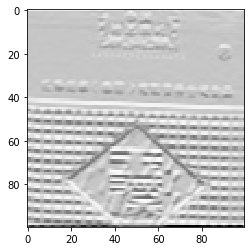

In [308]:
plt.imshow(output.numpy()[0,:,:,0], cmap='Greys')